In [1]:
import pandas as pd
import geopandas
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import shapefile as shp
from paths import *
from refuelplot import *
setup()

In [19]:
wpNZ = pd.read_csv(data_path + "/NZ/windparks_NZ.csv", delimiter=';')
wpBRA = pd.read_csv(data_path + '/BRA/turbine_data.csv',index_col=0)
wpUSA = pd.read_csv(data_path + '/USA/uswtdb_v2_3_20200109.csv')
# remove Guam
wpUSA = wpUSA[wpUSA.t_state!='GU']
wpZAF = pd.read_csv(data_path + '/ZAF/windparks_ZAF.csv')

In [3]:
shpBRA = geopandas.read_file(data_path + '/country_shapefiles/BRA/BRA_adm1.shp')
shpNZ = geopandas.read_file(data_path + '/country_shapefiles/NZ/CON2017_HD_Clipped.shp')
shpUSA = geopandas.read_file(data_path + '/country_shapefiles/USA/cb_2018_us_state_500k.shp')
shpZAF = geopandas.read_file(data_path + '/country_shapefiles/ZAF/zaf_admbnda_adm1_2016SADB_OCHA.shp')

plot windparks: either all with opacity or aggregate to windparks and maybe use size as capacity indicator?

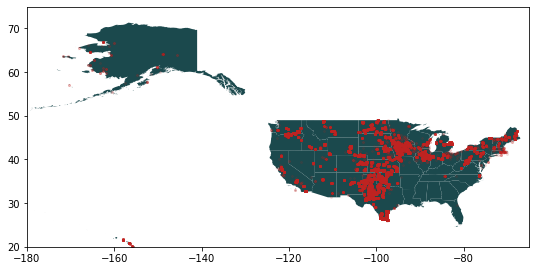

In [4]:
fig, ax = plt.subplots(figsize = (9,7))
ax.set_xlim(-180,-65)
ax.set_ylim(20,75)
shpUSA.plot(color=COLORS[4],ax=ax)
plt.plot(wpUSA.xlong,wpUSA.ylat,'o',alpha=0.1,markersize=2)

In [10]:
import xarray as xr
from matplotlib.patches import Rectangle

In [11]:
NZera5 = xr.open_dataset(era_path + '/NZ/era5_wind_NZ_198701.nc')

In [89]:
NZmerra2 = xr.open_dataset(mer_path + '/NZ/merra2_wind_NZ_198701.nc')

In [85]:
def cell_coords(lon,lat):
    diflat = NZera5.latitude.values - lat
    diflon = NZera5.longitude.values - lon
    clat = NZera5.latitude.values[abs(diflat)==min(abs(diflat))][0]
    clon = NZera5.longitude.values[abs(diflon)==min(abs(diflon))][0]
    return((clon-0.125,clat-0.125))

In [102]:
def cell_coords_mer(lon,lat):
    diflat = NZmerra2.lat.values - lat
    diflon = NZmerra2.lon.values - lon
    clat = NZmerra2.lat.values[abs(diflat)==min(abs(diflat))][0]
    clon = NZmerra2.lon.values[abs(diflon)==min(abs(diflon))][0]
    return((clon-0.3125,clat-0.25))

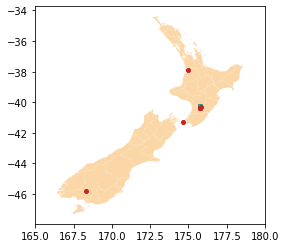

In [88]:
shpNZ.to_crs({'init': 'epsg:4326'}).plot(color=COLORS[3]).set_xlim(165,180)
plt.plot(wpNZ.Longitude,wpNZ.Latitude,'o',markersize=4)

ax = plt.gca()
rect = matplotlib.patches.Rectangle(xy=cell_coords(wpNZ.Longitude[0],wpNZ.Latitude[0]),width= 0.25,height=0.25,alpha=0.7,color=COLORS[1])
ax.add_patch(rect)

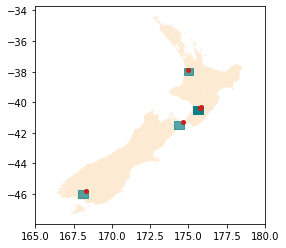

In [111]:
shpNZ.to_crs({'init': 'epsg:4326'}).plot(color=COLORS[3],alpha=0.5).set_xlim(165,180)
plt.plot(wpNZ.Longitude,wpNZ.Latitude,'o',markersize=4)

ax = plt.gca()
for i in range(len(wpNZ)):
    rect = matplotlib.patches.Rectangle(xy=cell_coords_mer(wpNZ.Longitude[i],wpNZ.Latitude[i]),width= 0.625,height=0.5,alpha=0.7,color=COLORS[1])
    ax.add_patch(rect)
plt.savefig(results_path + '/plots/syssize_NZ.png')

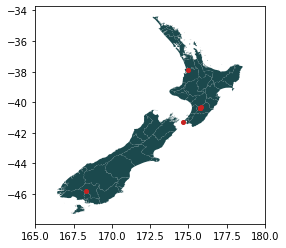

In [5]:
shpNZ.to_crs({'init': 'epsg:4326'}).plot(color=COLORS[4]).set_xlim(165,180)
plt.plot(wpNZ.Longitude,wpNZ.Latitude,'o',markersize=4)

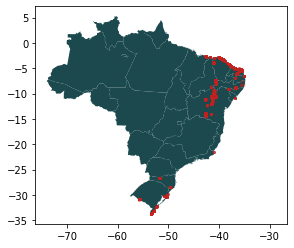

In [6]:
shpBRA.plot(color=COLORS[4])
plt.plot(wpBRA.lon,wpBRA.lat,'o',alpha=0.1,markersize=2)

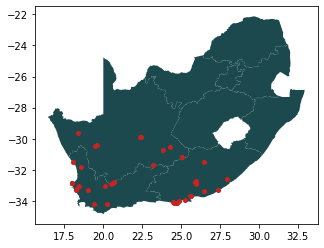

In [7]:
shpZAF.plot(color=COLORS[4])
plt.plot(wpZAF.Longitude,wpZAF.Latitude,'o',markersize=4)

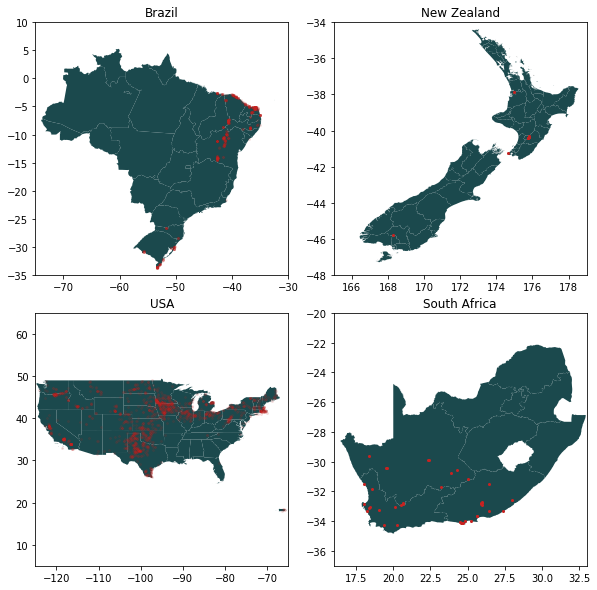

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(10,10),gridspec_kw = {'wspace':0.15, 'hspace':0.15})

shpBRA.plot(color=COLORS[4],ax=ax1)
ax1.set_xlim(-75,-30)
ax1.set_ylim(-35,10)
ax1.plot(wpBRA.groupby('name').mean().lon,
         wpBRA.groupby('name').mean().lat,'o',alpha=0.1,markersize=2)
ax1.set_title('Brazil')

shpNZ.to_crs({'init': 'epsg:4326'}).plot(color=COLORS[4],ax=ax2).set_xlim(165,180)
ax2.set_xlim(165,179)
ax2.set_ylim(-48,-34)
ax2.plot(wpNZ.Longitude,wpNZ.Latitude,'o',markersize=2)
ax2.set_title('New Zealand')

#ax3.set_xlim(-180,-65)
#ax3.set_ylim(-20,95)
ax3.set_xlim(-125,-65)
ax3.set_ylim(5,65)
shpUSA.plot(color=COLORS[4],ax=ax3)
#ax3.plot(wpUSA.xlong,wpUSA.ylat,'o',alpha=0.1,markersize=2)
ax3.plot(wpUSA.groupby('p_name').mean().xlong,
         wpUSA.groupby('p_name').mean().ylat,'o',alpha=0.1,markersize=2)
ax3.set_title('USA')

shpZAF.plot(color=COLORS[4],ax=ax4)
ax4.set_xlim(16,33)
ax4.set_ylim(-37,-20)
ax4.plot(wpZAF.Longitude,wpZAF.Latitude,'o',markersize=2)
ax4.set_title('South Africa')
plt.savefig(results_path + '/map_windparks.png')

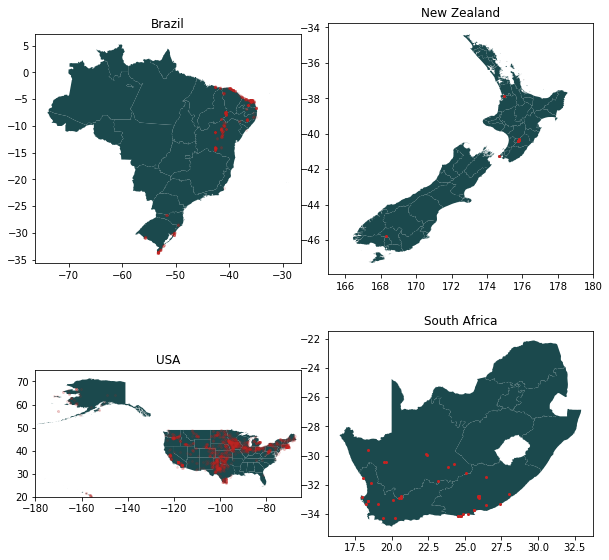

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(10,10),gridspec_kw = {'wspace':0.1, 'hspace':0.1})

shpBRA.plot(color=COLORS[4],ax=ax1)
#ax1.plot(wpBRA.lon,wpBRA.lat,'o',alpha=0.1,markersize=2)
ax1.plot(wpBRA.groupby('name').mean().lon,
         wpBRA.groupby('name').mean().lat,'o',alpha=0.1,markersize=2)
ax1.set_title('Brazil')

shpNZ.to_crs({'init': 'epsg:4326'}).plot(color=COLORS[4],ax=ax2).set_xlim(165,180)
ax2.plot(wpNZ.Longitude,wpNZ.Latitude,'o',markersize=2)
ax2.set_title('New Zealand')

ax3.set_xlim(-180,-65)
ax3.set_ylim(20,75)
#ax3.set_ylim(0,87)
shpUSA.plot(color=COLORS[4],ax=ax3)
#ax3.plot(wpUSA.xlong,wpUSA.ylat,'o',alpha=0.1,markersize=2)
ax3.plot(wpUSA.groupby('p_name').mean().xlong,
         wpUSA.groupby('p_name').mean().ylat,'o',alpha=0.1,markersize=2)
ax3.set_title('USA')

shpZAF.plot(color=COLORS[4],ax=ax4)
ax4.plot(wpZAF.Longitude,wpZAF.Latitude,'o',markersize=2)
ax4.set_title('South Africa')
plt.savefig(results_path + '/map_windparks.png')